# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [33]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [35]:
#grab api url with api key
url = f'http://api.openweathermap.org/data/2.5/weather?&APPID={weather_api_key}&units=imperial&q='

#empty df to be filled with necessary infor for each location
weather_data = pd.DataFrame(columns = ["City", "Country", "Lat", "Long", "Max Temp (F)", "Humidity (%)", 
                                       "Cloudiness (%)", "Wind Speed (mph)","Date"])

print("Beginning Data Retrieval")
print("-----------------------------")

count = 1

#loop through each city in cities and check if it's in weather api. skip city if not
for city in cities:
    print(f'Processing Record {count} | {city}')
    
    try:
        response = requests.get(url+city).json()
        
        weather_data = weather_data.append({'City':response['name'],
                                            'Country':response['sys']['country'],
                                            'Lat': response['coord']['lat'],
                                            'Long': response['coord']['lon'],
                                            'Max Temp (F)': response['main']['temp_max'],
                                            'Humidity (%)': response['main']['humidity'],
                                            'Cloudiness (%)': response['clouds']['all'],
                                            'Wind Speed (mph)': response['wind']['speed'], 
                                            'Date':response['dt']},ignore_index = True)
    except KeyError:
        print("City not found. Skipping...")
        pass
    
    count += 1

Beginning Data Retrieval
-----------------------------
Processing Record 1 | bredasdorp
Processing Record 2 | nikolskoye
Processing Record 3 | arraial do cabo
Processing Record 4 | portland
Processing Record 5 | aguazul
Processing Record 6 | hobart
Processing Record 7 | tiksi
Processing Record 8 | busselton
Processing Record 9 | rudnogorsk
Processing Record 10 | sumenep
Processing Record 11 | zhigansk
Processing Record 12 | gallup
Processing Record 13 | lake city
Processing Record 14 | barrow
Processing Record 15 | castro
Processing Record 16 | north bend
Processing Record 17 | byron bay
Processing Record 18 | sentyabrskiy
City not found. Skipping...
Processing Record 19 | upernavik
Processing Record 20 | lodwar
Processing Record 21 | longyearbyen
Processing Record 22 | grindavik
Processing Record 23 | henties bay
Processing Record 24 | chokurdakh
Processing Record 25 | college
Processing Record 26 | rikitea
Processing Record 27 | chagda
City not found. Skipping...
Processing Record 28

Processing Record 236 | charters towers
Processing Record 237 | ahuimanu
Processing Record 238 | saint george
Processing Record 239 | sisimiut
Processing Record 240 | rio grande
Processing Record 241 | fairhope
Processing Record 242 | luderitz
Processing Record 243 | dongsheng
Processing Record 244 | mujiayingzi
Processing Record 245 | rungata
City not found. Skipping...
Processing Record 246 | laguna
Processing Record 247 | korla
Processing Record 248 | pathein
Processing Record 249 | banda aceh
Processing Record 250 | severo-kurilsk
Processing Record 251 | ciudad bolivar
Processing Record 252 | landerneau
Processing Record 253 | ngunguru
Processing Record 254 | kununurra
Processing Record 255 | esna
Processing Record 256 | sao joao da barra
Processing Record 257 | ugoofaaru
Processing Record 258 | vestmannaeyjar
Processing Record 259 | sao filipe
Processing Record 260 | sangar
Processing Record 261 | tobol
Processing Record 262 | kambove
Processing Record 263 | brasilia
Processing Re

Processing Record 467 | toliary
City not found. Skipping...
Processing Record 468 | saint-pierre
Processing Record 469 | bronkhorstspruit
Processing Record 470 | benguela
Processing Record 471 | hasaki
Processing Record 472 | valley city
Processing Record 473 | saint-francois
Processing Record 474 | honiara
Processing Record 475 | sosnogorsk
Processing Record 476 | alice springs
Processing Record 477 | togur
Processing Record 478 | sahrak
City not found. Skipping...
Processing Record 479 | bam
Processing Record 480 | kailua
Processing Record 481 | belyy yar
Processing Record 482 | capim grosso
Processing Record 483 | bandarbeyla
Processing Record 484 | calama
Processing Record 485 | yurty
Processing Record 486 | maria aurora
Processing Record 487 | khakhea
Processing Record 488 | stokmarknes
Processing Record 489 | beruni
City not found. Skipping...
Processing Record 490 | liverpool
Processing Record 491 | macaboboni
City not found. Skipping...
Processing Record 492 | podor
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [36]:
#Export data frame to csv
with open(output_data_file,'w',newline='\n',encoding='utf-8') as csv:
    weather_data.to_csv(csv, index=False)
csv.close()

In [37]:
#read csv
with open(output_data_file,'r',encoding='utf-8') as csv:
    weather_read = pd.read_csv(csv,na_filter=False)
weather_read.describe(include='all')

,City,Country,Lat,Long,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
count,542,542,542.000000,542.000000,542.000000,542.000000,542.00000,542.000000,5.420000e+02
unique,541,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Praia,RU,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,20.377663,20.809906,60.396771,70.776753,61.45572,8.267159,1.650652e+09
std,NaN,NaN,33.286421,90.475330,22.742945,22.418057,38.44343,5.823452,7.434980e+01
min,NaN,NaN,-54.800000,-179.166700,-6.300000,6.000000,0.00000,0.000000,1.650652e+09
25%,NaN,NaN,-7.229175,-56.112075,47.267500,58.000000,21.00000,3.960000,1.650652e+09
50%,NaN,NaN,24.418600,23.726250,63.830000,75.500000,75.00000,6.890000,1.650652e+09
75%,NaN,NaN,48.751100,104.008300,78.387500,88.000000,100.00000,11.500000,1.650652e+09


In [44]:
#format date

#convert to readable format
weather_read["Date (Formatted)"] = pd.to_datetime(weather_read['Date'],unit='s')

#remove time
weather_read['Date (Formatted)'] = pd.to_datetime(weather_read['Date (Formatted)']).dt.date
weather_read['Date (Formatted)'] = pd.to_datetime(weather_read['Date (Formatted)']).dt.strftime('%m/%d/%Y')
weather_read.head()

,City,Country,Lat,Long,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date,Date (Formatted)
0,Bredasdorp,ZA,-34.5322,20.0403,61.41,52,81,8.75,1650652147,04/22/2022
1,Nikolskoye,RU,59.7035,30.7861,51.69,72,100,3.96,1650652147,04/22/2022
2,Arraial do Cabo,BR,-22.9661,-42.0278,82.26,65,0,9.22,1650652148,04/22/2022
3,Portland,US,45.5234,-122.6762,59.38,71,20,4.00,1650651962,04/22/2022
4,Aguazul,CO,5.1728,-72.5471,82.76,73,89,4.34,1650652148,04/22/2022


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [29]:
#highest humidity is 100% max from describe above

In [30]:
#  Get the indices of cities that have humidity over 100%.


In [31]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [103]:
#get todays date for title
today_date = weather_read['Date (Formatted)'][0]

#define function that makes scatter plot. Arguments are the y axis name and the second part of title. 
def scatter_plot(y_axis_name, title_name):
    plt.scatter(weather_read['Lat'],weather_read[y_axis_name],edgecolors='black')
    plt.title(f"City Latitude vs. {title_name} ({today_date})")
    plt.xlabel('Latitude')
    plt.ylabel(y_axis_name)

    plt.grid()
    plt.savefig(f'output_data/lat_{title_name}_scatter.png')
    plt.show()

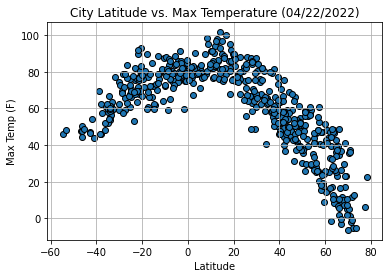

In [104]:
scatter_plot('Max Temp (F)','Max Temperature')

Observation:
This plot is looking at how the lattitude is affecting the temperature. It shows how the further away from the equator at '0' we get, the more the temperature decreases

## Latitude vs. Humidity Plot

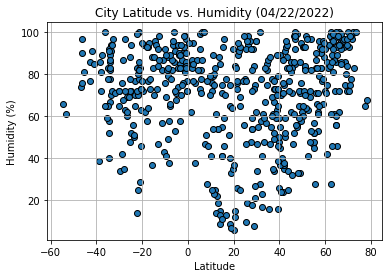

In [105]:
scatter_plot('Humidity (%)','Humidity')

Observation:
This plot is looking at how the lattitude is affecting the humidity. There does not appear to be a very obvious trend between location and humidity. However, we can see a large percentage of places having a high humidity over 60% compared to places below.

## Latitude vs. Cloudiness Plot

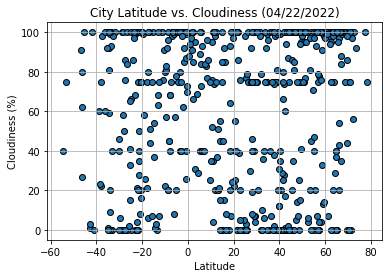

In [106]:
scatter_plot('Cloudiness (%)','Cloudiness')

Observation:
This plot is looking at how the lattitude is affecting the cloudiness. This plot identifies how there is a pretty good split between covered vs no clouds. This may also explain the high humidity from the plot above.

## Latitude vs. Wind Speed Plot

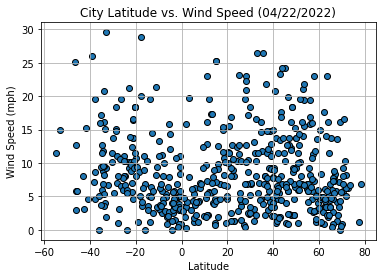

In [107]:
scatter_plot('Wind Speed (mph)','Wind Speed')

Observation:
This plot is looking at how the lattitude is affecting the wind speed. There does not appear to be many locations with strong wind above 15 mph. 

## Linear Regression

In [84]:
northern = weather_read.loc[weather_read['Lat'] >= 0]
southern = weather_read.loc[weather_read['Lat'] < 0]

#define function for each scatter and linear regression
def scatter_regression(location,y_axis_name,eqn_x_loc,eqn_y_loc):
    #make scatter plot
    plt.scatter(location['Lat'],location[y_axis_name])
    plt.xlabel('Latitude')
    plt.ylabel(y_axis_name)
    plt.title(f'City Latitude vs. {y_axis_name} ({today_date})')
    
    #linear regression equation
    slope, intercept, r_value, p_value, std_err = linregress(location['Lat'], location[y_axis_name])
    str_eqn = f'y={round(slope,2)}x+{round(intercept,2)}'
    
    #Line of linear regression plot
    lin_reg = slope*location['Lat'] + intercept
    plt.plot(location['Lat'],lin_reg,color='r')
    plt.annotate(str_eqn, (eqn_x_loc,eqn_y_loc), color='r', fontsize='14')
    
    #print R-Value (Assuming they want actual R-Value. Not R^2)
    print(f'The r-value is {r_value}')
    
    plt.show()
    


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8797454351111976


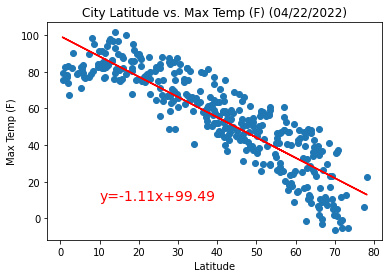

In [85]:
scatter_regression(northern, "Max Temp (F)", 10,10)

Observation:
This plot is looking at how the lattitude is affecting the temperature for the north. A clear slope of temperature decreasing as moving away from equator is visible.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7502836586649742


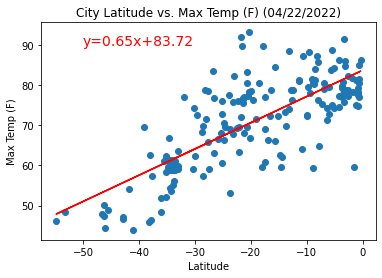

In [87]:
scatter_regression(southern, "Max Temp (F)", -50,90)

Observation:
This plot is looking at how the lattitude is affecting the temperature for the south. A clear slope of temperature increasing as moving towards the equator is visible.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.3023179316039447


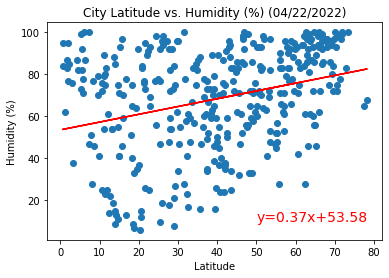

In [89]:
scatter_regression(northern, "Humidity (%)", 50,10)

Observation:
This plot is looking at how the lattitude is affecting the humidity for the north. Humidity can be seen increasing overall as moving away from the equator. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.14452676317389987


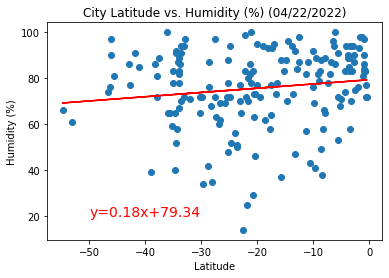

In [91]:
scatter_regression(southern, "Humidity (%)", -50,20)

Observation:
This plot is looking at how the lattitude is affecting the humidity for the south. Humidity can be seen increasing overall as moving towards the equator. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.13707862285133485


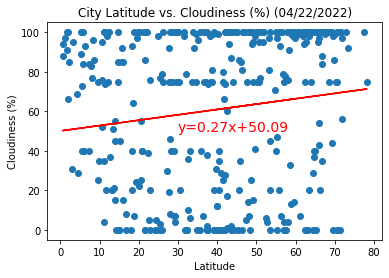

In [94]:
scatter_regression(northern, "Cloudiness (%)", 30,50)

Observation:
This plot is looking at how the lattitude is affecting the cloudiness for the north. Clouds can be seen increasing overall as moving away from the equator. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.20615676474761777


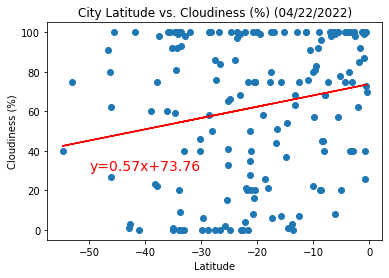

In [97]:
scatter_regression(southern, "Cloudiness (%)", -50,30)

Observation:
This plot is looking at how the lattitude is affecting the cloudiness for the south. Humidity can be seen increasing overall as movingtowards the equator. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.03559163399670112


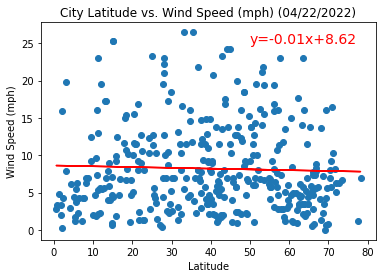

In [99]:
scatter_regression(northern, "Wind Speed (mph)", 50,25)

Observation:
This plot is looking at how the lattitude is affecting the wind speed for the north. Overall, the wind appears to be very flat through the north.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.3440410680779311


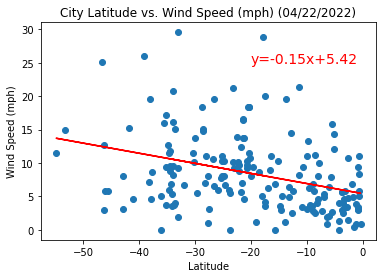

In [102]:
scatter_regression(southern, "Wind Speed (mph)", -20,25)

Observation:
This plot is looking at how the lattitude is affecting the wind speed for the south. Overall, the wind appears to bedecreasing towards the equator.